# Quantitative Fundamental Analysis 1

Fundamental analysis (FA) is a method of measuring a security's intrinsic value by examining related economic and financial factors. Fundamental analysts study anything that can affect the security's value, from macroeconomic factors such as the state of the economy and industry conditions to microeconomic factors like the effectiveness of the company's management.The end goal is to arrive at a number that an investor can compare with a security's current price in order to see whether the security is undervalued or overvalued.

This method of stock analysis is considered to be in contrast to technical analysis, which forecasts the direction of prices through an analysis of historical market data such as price and volume.

## Quantitative FA

Quantitative fundamentals are hard numbers. They are the measurable characteristics of a business. That's why the biggest source of quantitative data is financial statements. Revenue, profit, assets, and more can be measured with great precision.

In [1]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf

Now lets scrape wikipedia page to get all the ticker symbols of Dow Jones Industrial Average

In [2]:
url = r'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url) # Returns list of all tables on page
df = tables[0]

In [3]:
df.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')

In [4]:
df.Symbol.values.tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMTM',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',

There are 30 stocks in the index and their respective tickers are listed which we are interest in.

In [19]:
tickers = ["TSLA", "UPWK", "ORCL", "NFLX", "AAPL"]
tickers = list(set(tickers))
tickers

['ORCL', 'UPWK', 'AAPL', 'TSLA', 'NFLX']

Lets get fundamental information on these stocks using yahoofinance.

In [20]:
infos = []
for tick in tickers:
    infos.append(yf.Ticker(tick).info)

infos = pd.DataFrame(infos)
infos.set_index('symbol', inplace=True)

In [21]:
infos

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,freeCashflow,operatingCashflow,earningsGrowth,revenueGrowth,grossMargins,ebitdaMargins,operatingMargins,financialCurrency,trailingPegRatio,address2
symbol,,,,,,,,,,,,,,,,,,,,,
ORCL,2300 Oracle Way,Austin,TX,78741,United States,(737) 867-1000,https://www.oracle.com,Software - Infrastructure,software-infrastructure,Software - Infrastructure,...,10339500032,19125999616,0.198,0.069,0.71311,0.40515,0.30518,USD,1.9811,NaN
UPWK,475 Brannan Street,San Francisco,CA,94107,United States,650 316 7500,https://www.upwork.com,Internet Content & Information,internet-content-information,Internet Content & Information,...,98692376,139735008,0.700,0.103,0.76723,0.08389,0.10730,USD,0.4967,Suite 430
AAPL,One Apple Park Way,Cupertino,CA,95014,United States,(408) 996-1010,https://www.apple.com,Consumer Electronics,consumer-electronics,Consumer Electronics,...,110846001152,118254002176,-0.341,0.061,0.46206,0.34437,0.31171,USD,2.5108,NaN
TSLA,1 Tesla Road,Austin,TX,78725,United States,512 516 8177,https://www.tesla.com,Auto Manufacturers,auto-manufacturers,Auto Manufacturers,...,676625024,14478999552,0.170,0.078,0.18229,0.13633,0.10789,USD,9.9239,NaN
NFLX,121 Albright Way,Los Gatos,CA,95032,United States,(408) 540-3700,https://www.netflix.com,Entertainment,entertainment,Entertainment,...,21647300608,7487483904,0.448,0.150,0.45251,0.26543,0.29614,USD,1.8567,NaN


Now we have the basic fundamental data about the stocks in the DOW jones industrial average. Lets figure out the columns that are interesting for analysis.

In [22]:
for col in infos.columns:
    print(col)

address1
city
state
zip
country
phone
website
industry
industryKey
industryDisp
sector
sectorKey
sectorDisp
longBusinessSummary
fullTimeEmployees
companyOfficers
auditRisk
boardRisk
compensationRisk
shareHolderRightsRisk
overallRisk
governanceEpochDate
compensationAsOfEpochDate
irWebsite
maxAge
priceHint
previousClose
open
dayLow
dayHigh
regularMarketPreviousClose
regularMarketOpen
regularMarketDayLow
regularMarketDayHigh
dividendRate
dividendYield
exDividendDate
payoutRatio
fiveYearAvgDividendYield
beta
trailingPE
forwardPE
volume
regularMarketVolume
averageVolume
averageVolume10days
averageDailyVolume10Day
bid
ask
bidSize
askSize
marketCap
fiftyTwoWeekLow
fiftyTwoWeekHigh
priceToSalesTrailing12Months
fiftyDayAverage
twoHundredDayAverage
trailingAnnualDividendRate
trailingAnnualDividendYield
currency
enterpriseValue
profitMargins
floatShares
sharesOutstanding
sharesShort
sharesShortPriorMonth
sharesShortPreviousMonthDate
dateShortInterest
sharesPercentSharesOut
heldPercentInsiders
hel

In [23]:
fundamental = ['industry','operatingCashflow','ebitda','freeCashflow','trailingPegRatio','pegRatio','earningsGrowth', 'currentRatio','debtToEquity','returnOnEquity','totalCash','totalDebt','quickRatio','beta3Year','beta','forwardEps','priceToBook','priceToSalesTrailing12Months','forwardPE','dividendRate','trailingPE','marketCap','dividendYield']
#lets filter out the fundamental data 
fund_info = infos[infos.columns[infos.columns.isin(fundamental)]]
fund_info

,industry,dividendRate,dividendYield,beta,trailingPE,forwardPE,marketCap,priceToSalesTrailing12Months,priceToBook,forwardEps,...,ebitda,totalDebt,quickRatio,currentRatio,debtToEquity,returnOnEquity,freeCashflow,operatingCashflow,earningsGrowth,trailingPegRatio
symbol,,,,,,,,,,,,,,,,,,,,,
ORCL,Software - Infrastructure,1.6,0.0085,1.013,48.502575,26.325655,521485778944,9.690342,48.216755,7.16,...,21802999808,84514996224,0.591,0.720,749.978,1.55578,10339500032,19125999616,0.198,1.9811
UPWK,Internet Content & Information,NaN,NaN,1.492,28.145163,14.393653,2332489216,3.061910,5.665585,1.16,...,63902000,369464000,2.358,3.179,89.857,0.22754,98692376,139735008,0.700,0.4967
AAPL,Consumer Electronics,1.0,0.0041,1.240,39.968750,29.251880,3673290440704,9.393764,64.510216,8.31,...,134660997120,119058997248,0.745,0.867,209.059,1.57413,110846001152,118254002176,-0.341,2.5108
TSLA,Auto Manufacturers,NaN,NaN,2.295,98.063010,109.729850,1148976758784,11.826832,16.414290,3.24,...,13244000256,12782999552,1.214,1.844,18.078,0.20389,676625024,14478999552,0.170,9.9239
NFLX,Entertainment,NaN,NaN,1.250,51.559704,38.202686,389439881216,10.360949,17.140331,23.78,...,9976898560,18508648448,0.975,1.133,81.461,0.34714,21647300608,7487483904,0.448,1.8567


Now we are ready to compare stocks in DOW JONES based on their fundamental data.

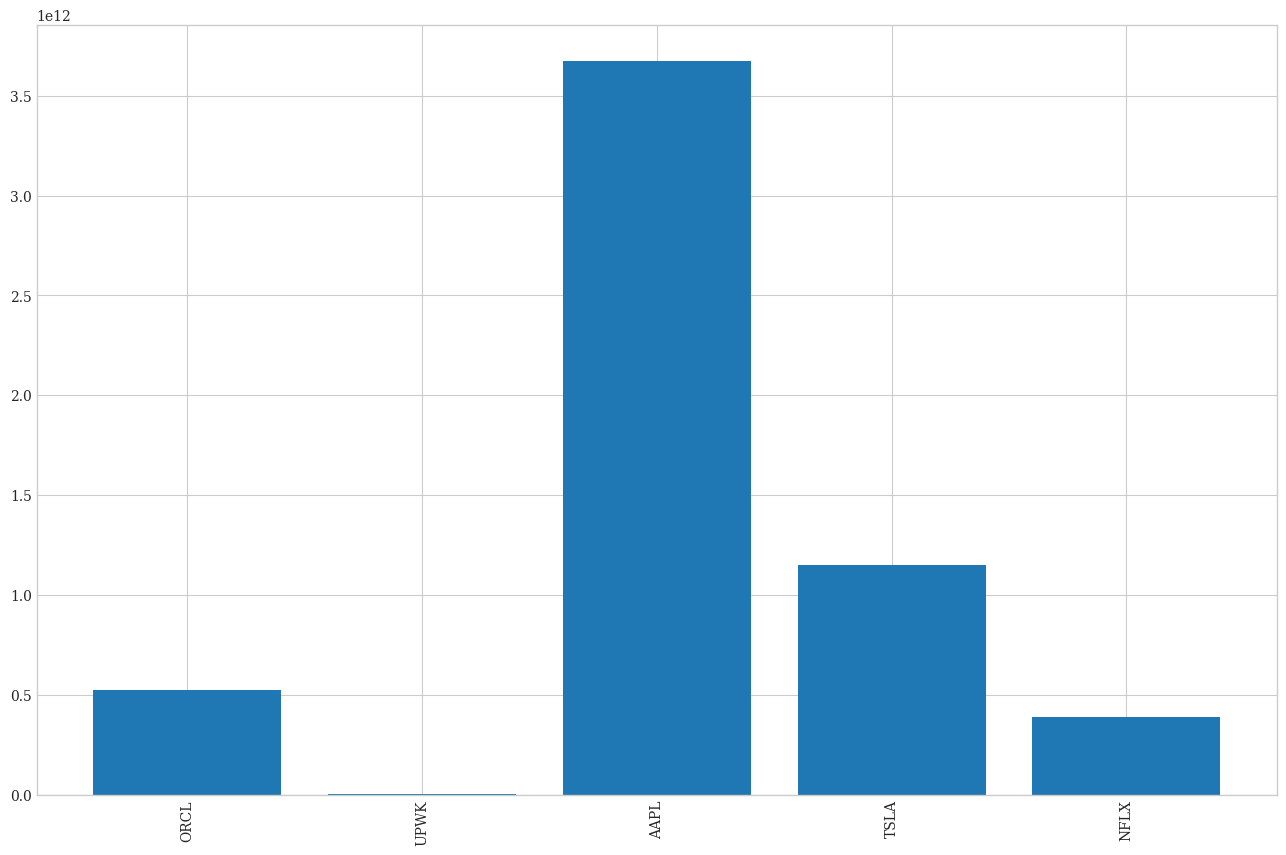

In [24]:
#First let plot out the companies with the biggest market cap
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['marketCap'])
plt.xticks(rotation = 90)
plt.show()

In [25]:
fund_info['marketCap'].nlargest(10)

symbol
AAPL    3673290440704
TSLA    1148976758784
ORCL     521485778944
NFLX     389439881216
UPWK       2332489216
Name: marketCap, dtype: int64

As suspected technology stocks are the top 2 then healthcare dominates which is also not suprising given the past few years.

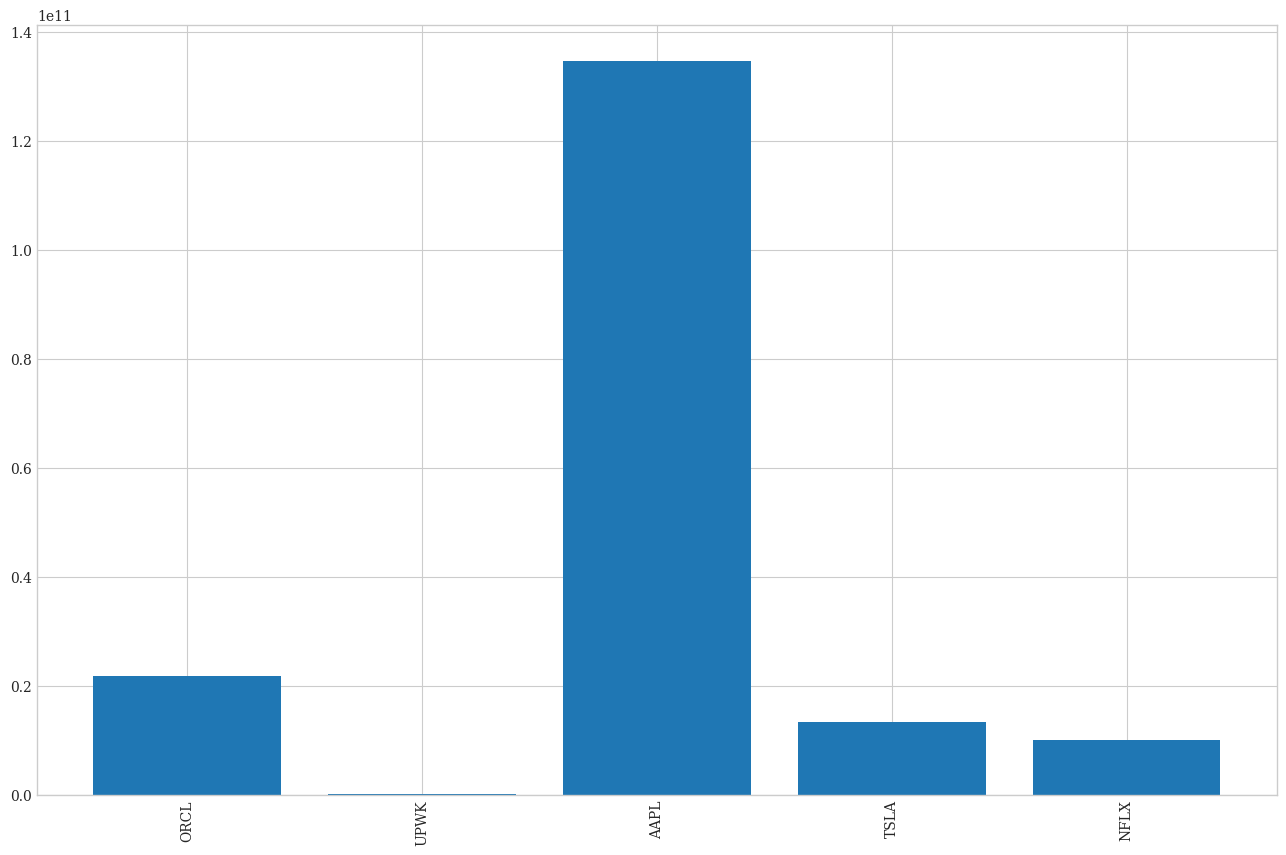

In [26]:
##First let plot out the companies with the biggest ebita
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['ebitda'])
plt.xticks(rotation = 90)
plt.show()

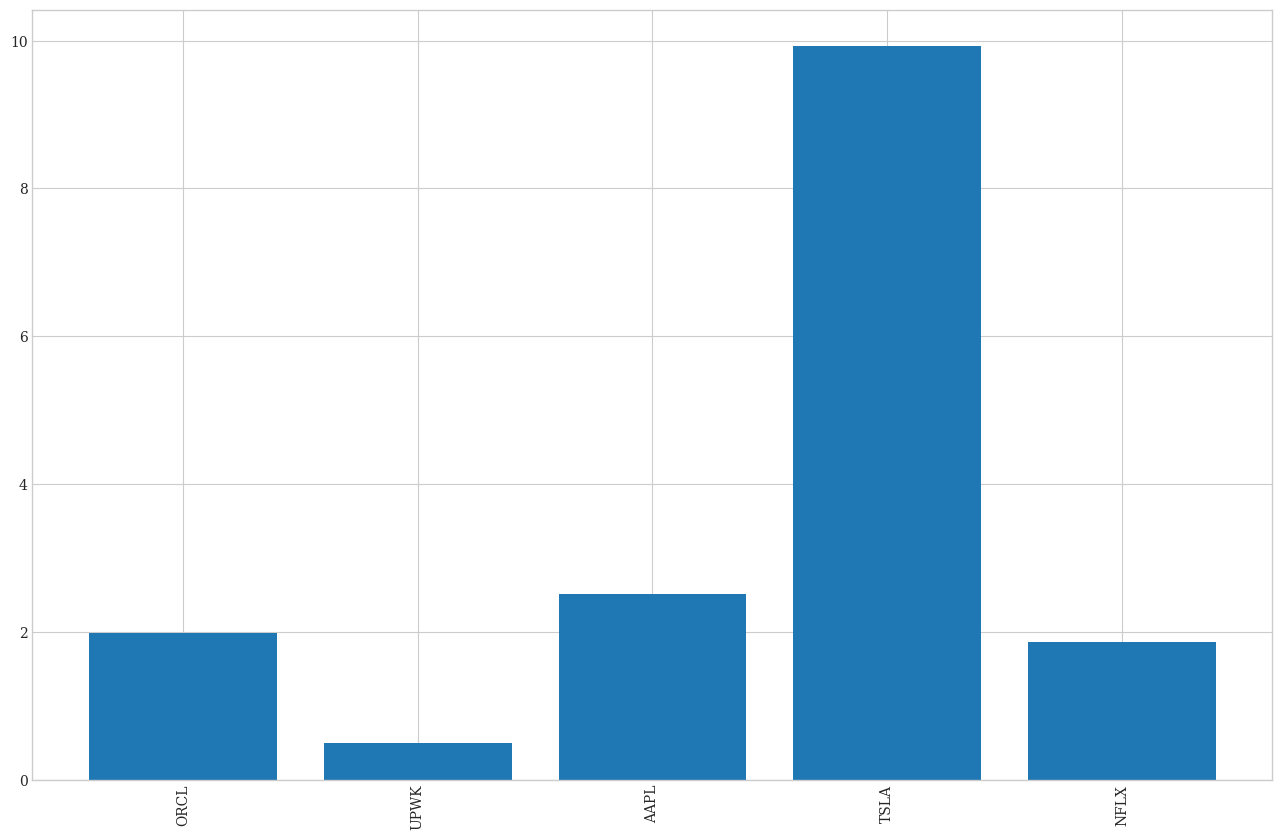

In [27]:
##First let plot out the companies with the biggest pegratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['trailingPegRatio'])
plt.xticks(rotation = 90)
plt.show()

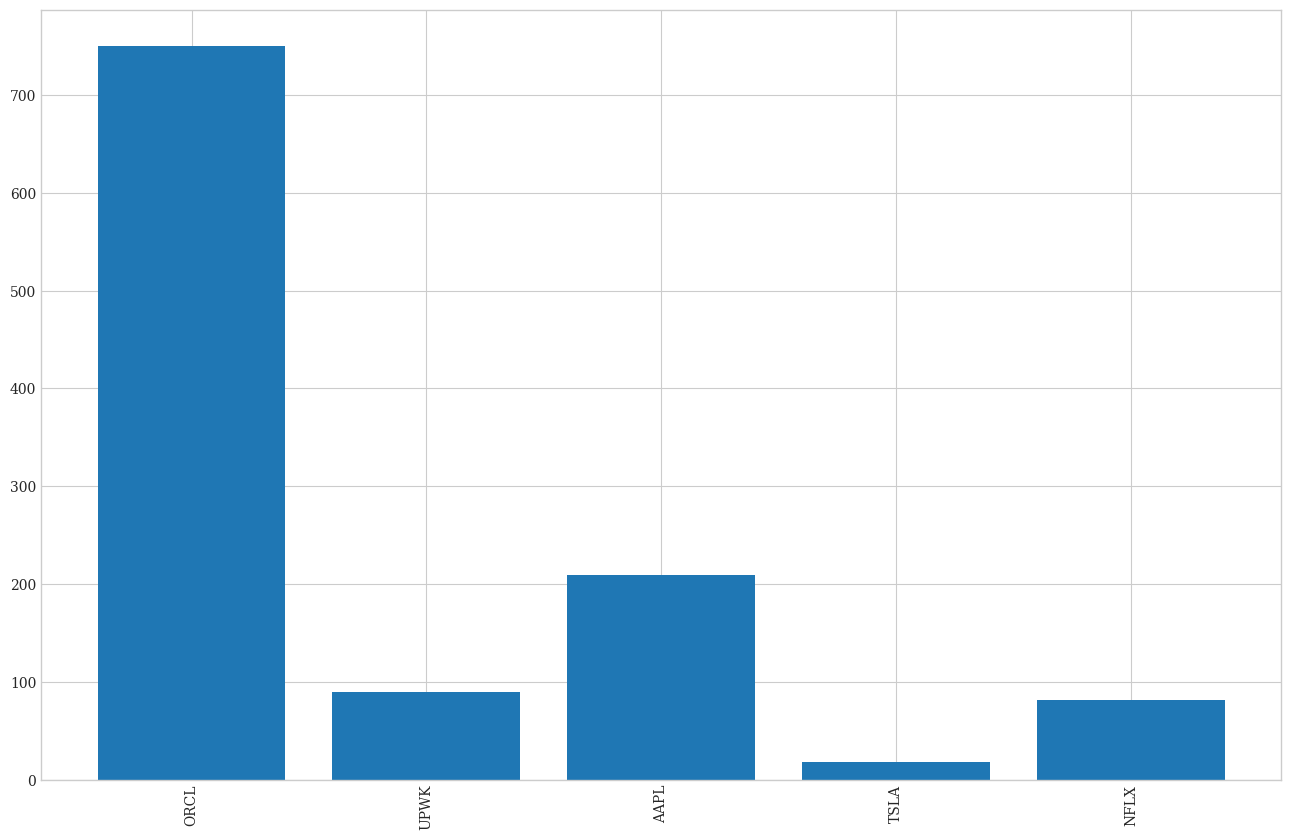

In [28]:
##First let plot out the companies with the biggest debt to equity ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['debtToEquity'])
plt.xticks(rotation = 90)
plt.show()

Woow Amgen is what you call being leveraged to its tits. Hope this is a data glitch rather than actual leverage.

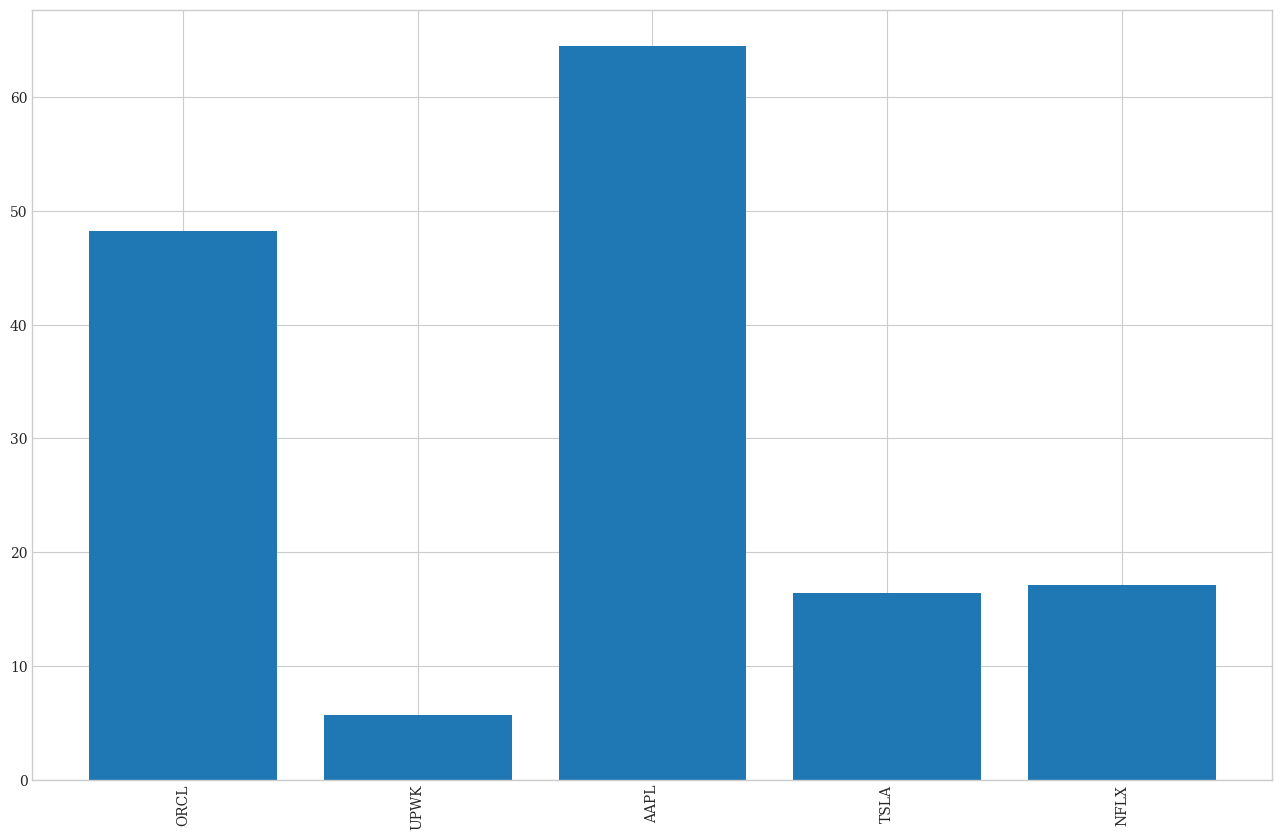

In [29]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['priceToBook'])
plt.xticks(rotation = 90)
plt.show()

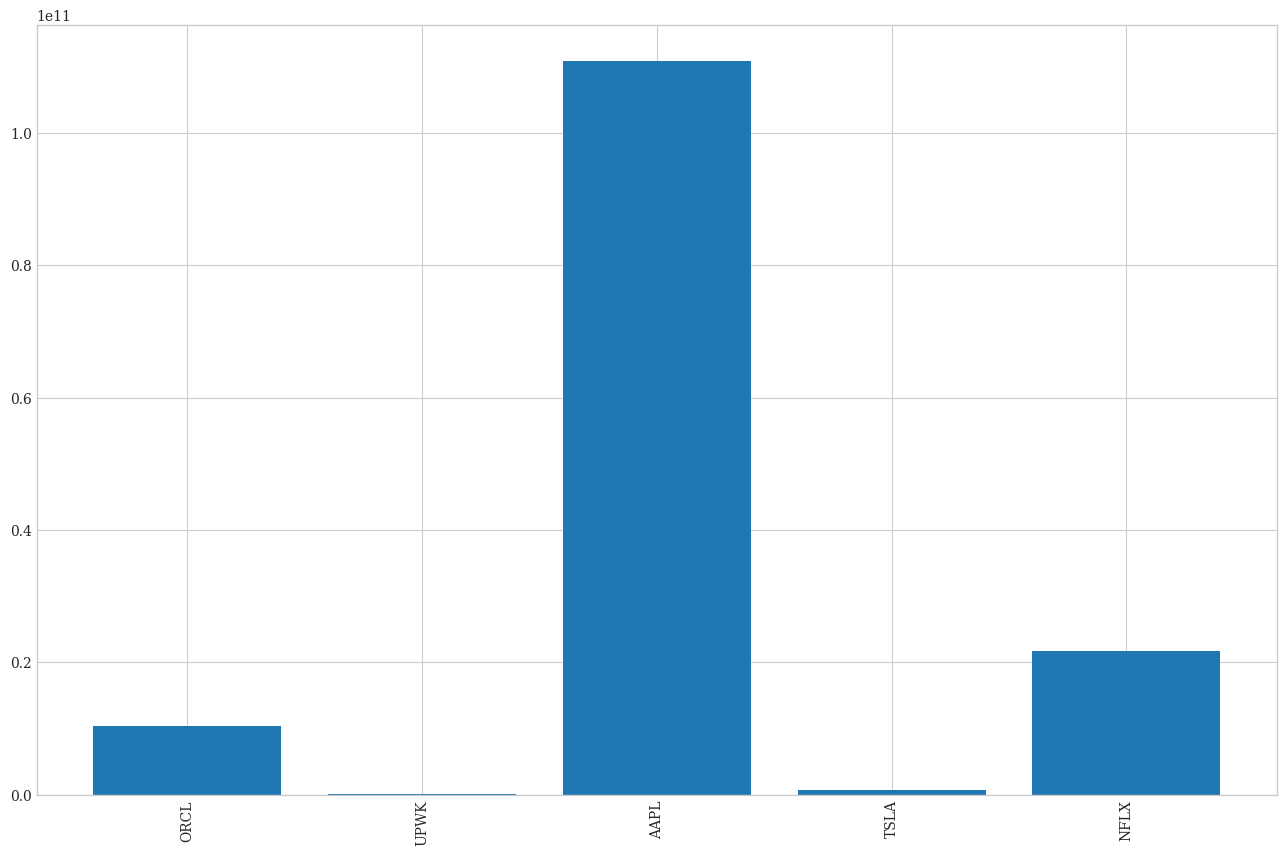

In [30]:

##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['freeCashflow'])
plt.xticks(rotation = 90)
plt.show()

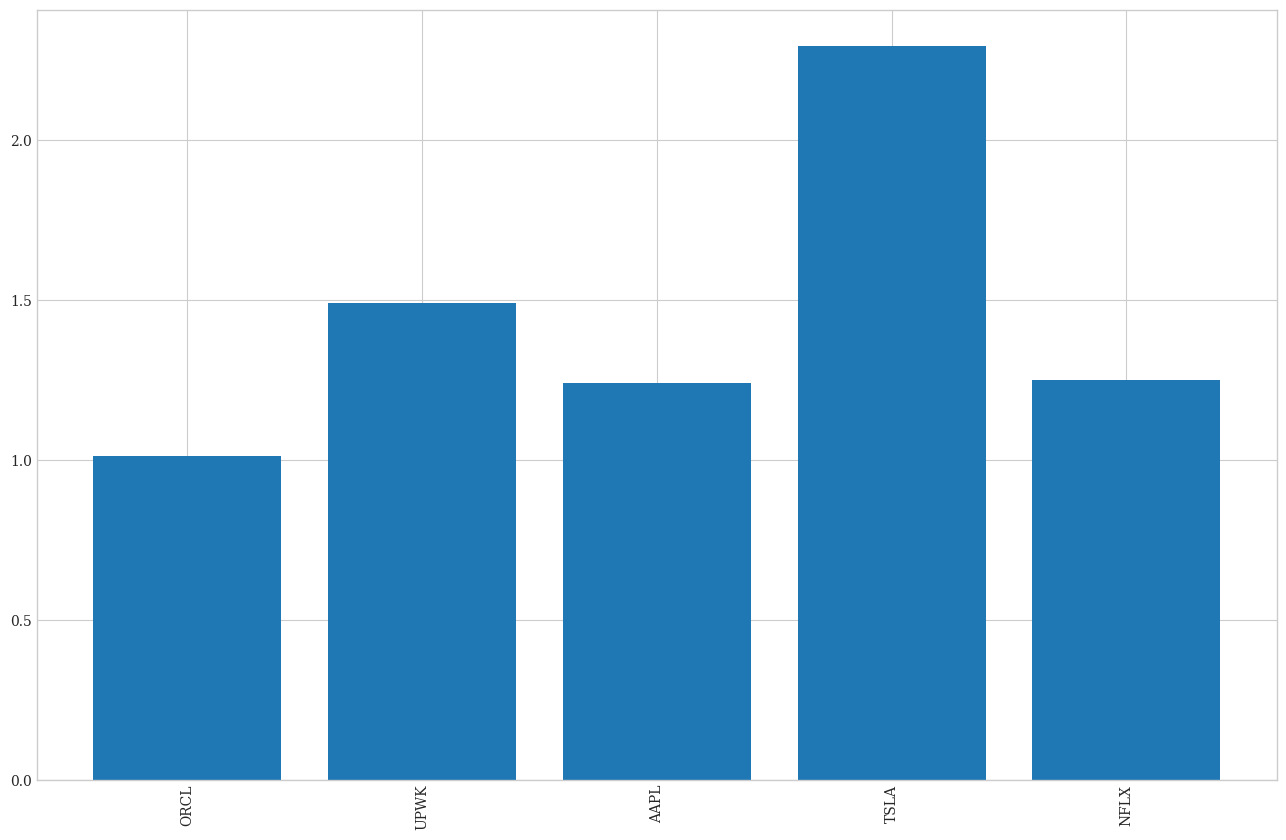

In [31]:
##First let plot out the companies with the biggest price to book ratio
plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['beta'])
plt.xticks(rotation = 90)
plt.show()

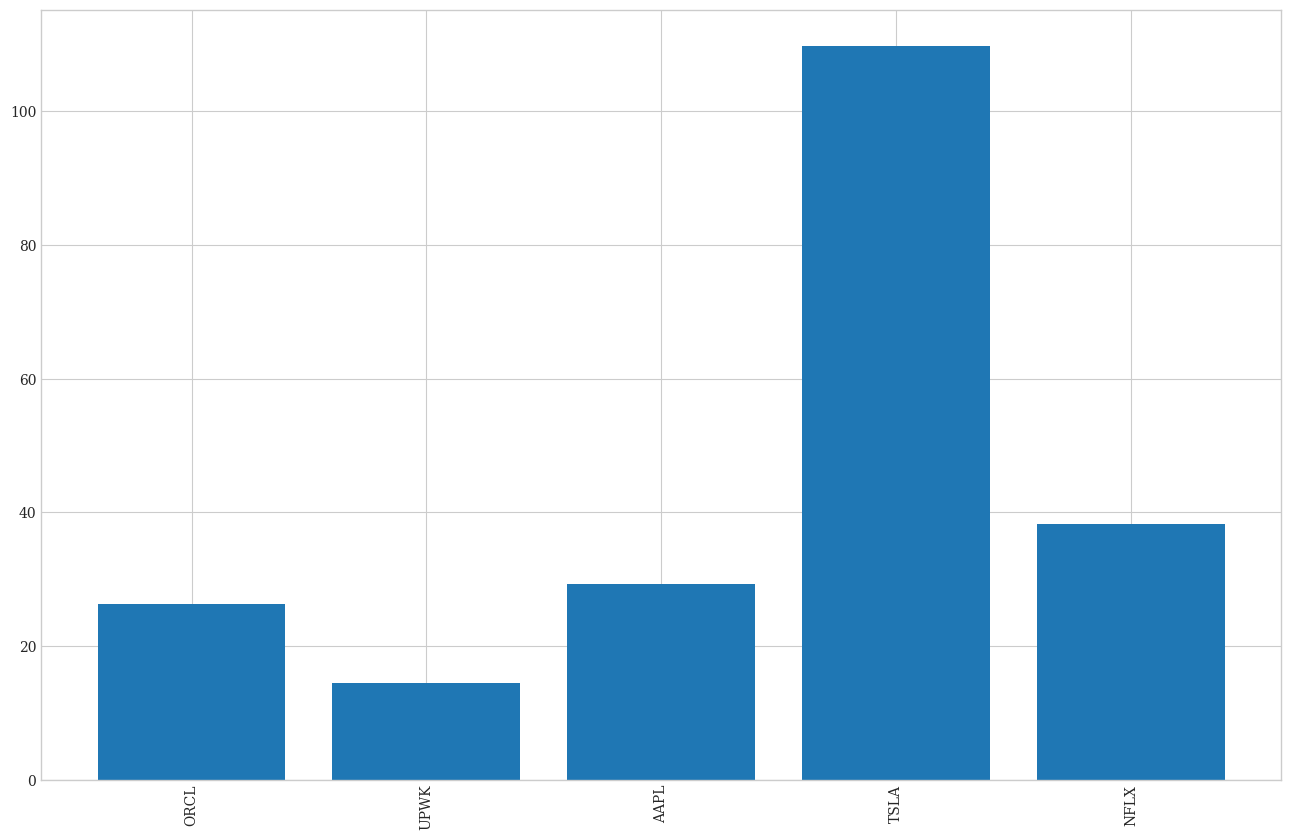

In [32]:

plt.figure(figsize=(16,10))
plt.bar(fund_info.index,fund_info['forwardPE'])
plt.xticks(rotation = 90)
plt.show()

In [34]:
fund_info.columns

Index(['industry', 'dividendRate', 'dividendYield', 'beta', 'trailingPE',
       'forwardPE', 'marketCap', 'priceToSalesTrailing12Months', 'priceToBook',
       'forwardEps', 'totalCash', 'ebitda', 'totalDebt', 'quickRatio',
       'currentRatio', 'debtToEquity', 'returnOnEquity', 'freeCashflow',
       'operatingCashflow', 'earningsGrowth', 'trailingPegRatio'],
      dtype='object')

## Balance sheet analysis and scoring stocks based on Piotroski F-score.

### What Is the Piotroski Score?

The Piotroski score is a discrete score between zero and nine that reflects nine criteria used to determine the strength of a firm's financial position. The Piotroski score is used to determine the best value stocks, with nine being the best and zero being the worst.

In [63]:
def fetch_financial_data(ticker):
    """
    Fetch financial data for a given ticker using yfinance.

    Parameters:
    ticker (str): The stock ticker symbol (e.g., "AAPL" for Apple).

    Returns:
    dict: A dictionary containing the financial metrics required for Piotroski Score.
    """
    # Fetch the company data
    stock = yf.Ticker(ticker)
    
    # Income statement
    income_stmt = stock.financials
    # print(income_stmt.T.columns)
    net_income = income_stmt.loc["Net Income"].iloc[0]  # Most recent net income
    net_income_prev = income_stmt.loc["Net Income"].iloc[1]  # Previous year's net income
    
    # Cash flow statement
    cashflow = stock.cashflow
    # print(cashflow.T.columns)
    operating_cash_flow = cashflow.loc["Cash Flow From Continuing Operating Activities"].iloc[0]  # Current OCF
    operating_cash_flow_prev = cashflow.loc["Cash Flow From Continuing Operating Activities"].iloc[1]  # Previous OCF
    
    # Balance sheet
    balance_sheet = stock.balance_sheet
    # print(balance_sheet.T.columns)
    total_assets = balance_sheet.loc["Total Assets"].iloc[0]  # Current year total assets
    total_assets_prev = balance_sheet.loc["Total Assets"].iloc[1]  # Previous year total assets
    total_liabilities = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0]  # Current liabilities
    total_liabilities_prev = balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[1]  # Previous liabilities
    current_assets = balance_sheet.loc["Current Assets"].iloc[0]
    current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[0]
    current_assets_prev = balance_sheet.loc["Current Assets"].iloc[1]
    current_liabilities_prev = balance_sheet.loc["Current Liabilities"].iloc[1]
    shares_outstanding = stock.info['sharesOutstanding']
    
    # Calculations
    roa_current = net_income / total_assets  # Current ROA
    roa_previous = net_income_prev / total_assets_prev  # Previous ROA
    leverage_current = total_liabilities / total_assets  # Current leverage
    leverage_previous = total_liabilities_prev / total_assets_prev  # Previous leverage
    current_ratio_current = current_assets / current_liabilities
    current_ratio_previous = current_assets_prev / current_liabilities_prev
    gross_margin_current = income_stmt.loc["Gross Profit"].iloc[0] / income_stmt.loc["Total Revenue"].iloc[0]
    gross_margin_previous = income_stmt.loc["Gross Profit"].iloc[1] / income_stmt.loc["Total Revenue"].iloc[1]
    asset_turnover_current = income_stmt.loc["Total Revenue"].iloc[0] / total_assets
    asset_turnover_previous = income_stmt.loc["Total Revenue"].iloc[1] / total_assets_prev

    # Compile data into a dictionary
    financials = {
        "net_income": net_income,
        "operating_cash_flow": operating_cash_flow,
        "roa_current": roa_current,
        "roa_previous": roa_previous,
        "leverage_current": leverage_current,
        "leverage_previous": leverage_previous,
        "current_ratio_current": current_ratio_current,
        "current_ratio_previous": current_ratio_previous,
        "shares_outstanding_current": shares_outstanding,
        "shares_outstanding_previous": shares_outstanding,  # Assuming no dilution data from yfinance
        "gross_margin_current": gross_margin_current,
        "gross_margin_previous": gross_margin_previous,
        "asset_turnover_current": asset_turnover_current,
        "asset_turnover_previous": asset_turnover_previous,
        "PE Ratio": stock.info['trailingPE'],
    }
    return financials

In [64]:
fetch_financial_data("AAPL")

{'net_income': 93736000000.0,
 'operating_cash_flow': 118254000000.0,
 'roa_current': 0.25682503150857583,
 'roa_previous': 0.27509834563776475,
 'leverage_current': 0.8439640528248123,
 'leverage_previous': 0.8237407929480435,
 'current_ratio_current': 0.8673125765340832,
 'current_ratio_previous': 0.9880116717592975,
 'shares_outstanding_current': 15115799552,
 'shares_outstanding_previous': 15115799552,
 'gross_margin_current': 0.4620634981523393,
 'gross_margin_previous': 0.4413112957720756,
 'asset_turnover_current': 1.0713874732862074,
 'asset_turnover_previous': 1.087077369016657,
 'PE Ratio': 39.96875}

In [61]:
balance_sheet = []
income_statement = []
cfs = []
years = []
profitability_score = 0
leverage_score = 0
operating_efficiency_score = 0
pe_ratio = 0

### Understanding the Piotroski Score

The Piotroski score is broken down into the following categories:
- Profitability
- Leverage, liquidity, and source of funds
- Operating efficiency

Profitability Criteria Include
- Positive net income (1 point)
- Positive return on assets (ROA) in the current year (1 point)
- Positive operating cash flow in the current year (1 point)
- Cash flow from operations being greater than net Income (quality of earnings) (1 point)

Leverage, Liquidity, and Source of Funds Criteria Include:
- Lower amount of long term debt in the current period, compared to the previous year (decreased leverage) (1 point)
- Higher current ratio this year compared to the previous year (more liquidity) (1 point)
- No new shares were issued in the last year (lack of dilution) (1 point).

Operating Efficiency Criteria Include:
- A higher gross margin compared to the previous year (1 point)
- A higher asset turnover ratio compared to the previous year (1 point)

In [70]:
def calculate_piotroski_score(financials):
    """
    Calculate the Piotroski Score based on a company's financial data.

    Parameters:
    financials (dict): Dictionary containing the following keys:
        - net_income (float): Net income of the company.
        - operating_cash_flow (float): Operating cash flow of the company.
        - roa_current (float): Return on assets (ROA) for the current year.
        - roa_previous (float): Return on assets (ROA) for the previous year.
        - leverage_current (float): Current year's leverage (debt-to-equity ratio).
        - leverage_previous (float): Previous year's leverage (debt-to-equity ratio).
        - current_ratio_current (float): Current ratio for the current year.
        - current_ratio_previous (float): Current ratio for the previous year.
        - shares_outstanding_current (float): Current year's number of shares outstanding.
        - shares_outstanding_previous (float): Previous year's number of shares outstanding.
        - gross_margin_current (float): Current year's gross margin.
        - gross_margin_previous (float): Previous year's gross margin.
        - asset_turnover_current (float): Current year's asset turnover ratio.
        - asset_turnover_previous (float): Previous year's asset turnover ratio.

    Returns:
    int: Piotroski Score (range: 0 to 9)
    """
    score = 0
    profitability_score = 0
    leverage_score = 0
    operating_efficiency_score = 0
    pe_ratio = 0

    # Profitability signals
    if financials['net_income'] > 0:
        profitability_score += 1  # Positive net income
    if financials['operating_cash_flow'] > 0:
        profitability_score += 1  # Positive operating cash flow
    if financials['operating_cash_flow'] > financials['net_income']:
        profitability_score += 1  # Operating cash flow > net income
    if financials['roa_current'] > financials['roa_previous']:
        profitability_score += 1  # ROA improvement

    # Leverage, Liquidity, and Source of Funds signals
    if financials['leverage_current'] < financials['leverage_previous']:
        leverage_score += 1  # Decreased leverage
    if financials['current_ratio_current'] > financials['current_ratio_previous']:
        leverage_score += 1  # Improved current ratio
    if financials['shares_outstanding_current'] <= financials['shares_outstanding_previous']:
        leverage_score += 1  # No dilution of shares

    # Operating Efficiency signals
    if financials['gross_margin_current'] > financials['gross_margin_previous']:
        operating_efficiency_score += 1  # Improved gross margin
    if financials['asset_turnover_current'] > financials['asset_turnover_previous']:
        operating_efficiency_score += 1  # Improved asset turnover ratio
    
    pe_ratio = financials['PE Ratio']

    return {
        "Profitablity": profitability_score,
        "Leverage": leverage_score,
        "Operating Efficiency": operating_efficiency_score,
        "PE Ratio": pe_ratio,
        "Piotroski Score" : profitability_score + leverage_score + operating_efficiency_score
    }

# Calculate Piotroski Score for each company
piotroski_scores = {}
for ticker in tickers:
    financials = fetch_financial_data(ticker)
    piotroski_score = calculate_piotroski_score(financials)
    piotroski_scores[ticker] = piotroski_score

df = pd.DataFrame(piotroski_scores).T
df.columns = ['PE Ratio', 'Profitablity', 'Leverage', 'Operating Efficiency', 'Piotroski Score']

In [71]:
df

,PE Ratio,Profitablity,Leverage,Operating Efficiency,Piotroski Score
ORCL,4.0,2.0,1.0,48.502575,7.0
UPWK,3.0,2.0,2.0,28.145163,7.0
AAPL,3.0,1.0,1.0,39.968750,5.0
TSLA,2.0,3.0,0.0,98.063010,5.0
NFLX,4.0,1.0,2.0,51.559704,7.0


In [67]:
piotroski_scores

{'ORCL': {'Profitablity': 4,
  'Leverage': 2,
  'Operating Efficiency': 1,
  'PE Ratio': 48.502575,
  'Piotroski Score': 55.502575},
 'UPWK': {'Profitablity': 3,
  'Leverage': 2,
  'Operating Efficiency': 2,
  'PE Ratio': 28.145163,
  'Piotroski Score': 35.145163},
 'AAPL': {'Profitablity': 3,
  'Leverage': 1,
  'Operating Efficiency': 1,
  'PE Ratio': 39.96875,
  'Piotroski Score': 44.96875},
 'TSLA': {'Profitablity': 2,
  'Leverage': 3,
  'Operating Efficiency': 0,
  'PE Ratio': 98.06301,
  'Piotroski Score': 103.06301},
 'NFLX': {'Profitablity': 4,
  'Leverage': 1,
  'Operating Efficiency': 2,
  'PE Ratio': 51.559704,
  'Piotroski Score': 58.559704}}

In [27]:
def get_data(ticker):
    global balance_sheet
    global income_statement
    global cfs
    global years
    ticker = yf.Ticker(ticker)
    balance_sheet = ticker.balance_sheet
    income_statement = ticker.income_stmt
    cfs = ticker.cashflow
    years = balance_sheet.columns

def pe(ticker):
    global pe_ratio
    pe_ratio = yfi.get_quote_table(ticker)['PE Ratio (TTM)']
    if pe_ratio != pe_ratio: #Check if NaN
        pe_ratio = 0   

def profitability():
    global profitability_score
    #Scores #1 and 2 - net income
    net_income = income_statement[years[0]]['Net Income']
    net_income_py = income_statement[years[1]]['Net Income']
    ni_score = 1 if net_income > 0 else 0
    ni_score_2 = 1 if net_income > net_income_py else 0

    #Score #3 - operating cash flow
    op_cf = cfs[years[0]]['Cash Flow From Continuing Operating Activities']
    op_cf_score = 1 if op_cf > 0 else 0

    #Score #4 - change in RoA
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2
    RoA = net_income / avg_assets
    RoA_py = net_income_py / avg_assets_py
    RoA_score = 1 if RoA > RoA_py else 0

    #Score #5 - Accruals
    total_assets = balance_sheet[years[0]]['Total Assets']
    accruals = op_cf / total_assets - RoA
    ac_score = 1 if accruals > 0 else 0

    profitability_score = ni_score + ni_score_2 + op_cf_score + RoA_score + ac_score

def leverage():
    global leverage_score
    #Score #6 - long-term debt ratio
    try:
        lt_debt = balance_sheet[years[0]]['Long Term Debt']
        total_assets = balance_sheet[years[0]]['Total Assets']
        debt_ratio = lt_debt / total_assets
        debt_ratio_score = 1 if debt_ratio < 0.4 else 0
    except:
        debt_ratio_score = 1

    #Score #7 - Current ratio
    current_assets = balance_sheet[years[0]]['Current Assets']
    current_liab = balance_sheet[years[0]]['Current Liabilities']
    current_ratio = current_assets / current_liab
    current_ratio_score = 1 if current_ratio > 1 else 0

    leverage_score = debt_ratio_score + current_ratio_score

def operating_efficiency():
    global operating_efficiency_score
    #Score #8 - Gross margin
    gp = income_statement[years[0]]['Gross Profit']
    gp_py = income_statement[years[1]]['Gross Profit']
    revenue = income_statement[years[0]]['Total Revenue']
    revenue_py = income_statement[years[1]]['Total Revenue']
    gm = gp / revenue
    gm_py = gp_py / revenue_py
    gm_score = 1 if gm > gm_py else 0
    
    #Score #9 - Asset turnover
    avg_assets = (balance_sheet[years[0]]['Total Assets']
                    + balance_sheet[years[1]]['Total Assets']) / 2
    avg_assets_py = (balance_sheet[years[1]]['Total Assets']
                    + balance_sheet[years[2]]['Total Assets']) / 2

    at = revenue / avg_assets #at = asset turnover
    at_py = revenue_py / avg_assets_py
    at_score = 1 if at > at_py else 0

    operating_efficiency_score = gm_score + at_score

In [28]:
for ticker in tickers:
    try:
        get_data(ticker)
        pe(ticker)
        profitability()
        leverage()
        operating_efficiency()
        new_row = {'Ticker': ticker,
                    'PE ratio': pe_ratio,
                    'Profitability': profitability_score,
                    'Leverage': leverage_score,
                    'Operating eficiency': operating_efficiency_score}

        summary = summary.append(new_row, ignore_index = True)
        print(ticker + ' added.')
        time.sleep(1)
    except Exception as e:
        print(ticker + ': Something went wrong.')
        print(str(e))
summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
summary

c:\Users\ishaa\OneDrive\Desktop\PythonProjects\Quant-Dashboard\venv\Lib\site-packages\yahoo_fin\stock_info.py:293: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


TSLA: Something went wrong.
'DataFrame' object has no attribute 'append'
NFLX: Something went wrong.
('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\Quant-Dashboard\venv\Lib\site-packages\yahoo_fin\stock_info.py:293: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


UPWK: Something went wrong.
'DataFrame' object has no attribute 'append'
ORCL: Something went wrong.
('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
AAPL: Something went wrong.
'DataFrame' object has no attribute 'append'


c:\Users\ishaa\OneDrive\Desktop\PythonProjects\Quant-Dashboard\venv\Lib\site-packages\yahoo_fin\stock_info.py:293: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score


A company that has Piotroski F-score of 8–9 is considered to be strong. Alternatively, firms achieving the F-score of 0–2 are considered to be weak. 

In [84]:
summary.sort_values(by = 'Total score', ascending = False)

,Ticker,PE ratio,Profitability,Leverage,Operating eficiency,Total score
12,CAT,16.62,5,2,2,9
2,CSCO,15.22,5,2,2,9
18,NFLX,50.14,5,2,2,9
9,KO,24.36,5,2,2,9
19,CRM,73.02,5,2,2,9
24,HON,23.63,4,2,2,8
14,V,32.30,5,2,1,8
5,AMZN,59.67,5,2,1,8
6,UPWK,216.00,4,2,2,8
7,IBM,23.59,5,1,2,8
